In [1]:
import pandas as pd
#1. Load into dataframe
df = pd.read_csv("dummies.csv", encoding = "ISO-8859-1")
df.columns

Index(['PRICEEACH', 'SALES', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'DEALSIZE',
       'STATE_', 'STATE_BC', 'STATE_CA', 'STATE_CT', 'STATE_Isle of Wight',
       'STATE_MA', 'STATE_NH', 'STATE_NJ', 'STATE_NSW', 'STATE_NV', 'STATE_NY',
       'STATE_Osaka', 'STATE_PA', 'STATE_Quebec', 'STATE_Queensland',
       'STATE_Tokyo', 'STATE_Victoria', 'COUNTRY_Australia', 'COUNTRY_Austria',
       'COUNTRY_Belgium', 'COUNTRY_Canada', 'COUNTRY_Denmark',
       'COUNTRY_Finland', 'COUNTRY_France', 'COUNTRY_Germany',
       'COUNTRY_Ireland', 'COUNTRY_Italy', 'COUNTRY_Japan', 'COUNTRY_Norway',
       'COUNTRY_Philippines', 'COUNTRY_Singapore', 'COUNTRY_Spain',
       'COUNTRY_Sweden', 'COUNTRY_Switzerland', 'COUNTRY_UK', 'COUNTRY_USA'],
      dtype='object')

In [2]:
df['DEALSIZE'].unique()

array([0, 1, 2])

In [3]:
#classify DEALSIZE
#split the dataframe X - predictors and y - target
X = df.drop('DEALSIZE', axis=1)
y = df['DEALSIZE']
#split dataset into test/train 
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=20)

In [4]:
#Regression example
from sklearn.linear_model import RidgeClassifier
#you can play with the hyperparameters to see how the prediction accuracy is affected 
clf = RidgeClassifier(alpha=0.01, solver='sag').fit(X_train, y_train)
predictions = clf.predict(X_test)
print(clf.score(X_test, y_test))
df_p = pd.DataFrame()
df_p['Actual'] = y_test
df_p['Predicted'] = predictions
df_p.head()

0.8290909090909091


,Actual,Predicted
766,0,1
1050,1,0
255,1,1
826,1,1
1730,0,0


In [5]:
#KNN example
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
predictions = knn.predict(X_test)
df_p = pd.DataFrame()
df_p['Actual'] = y_test
df_p['Predicted'] = predictions
df_p.head()

1.0


,Actual,Predicted
766,0,0
1050,1,1
255,1,1
826,1,1
1730,0,0


In [6]:
#SVC example
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))
predictions = clf.predict(X_test)
df_p = pd.DataFrame()
df_p['Actual'] = y_test
df_p['Predicted'] = predictions
df_p.head()

1.0


,Actual,Predicted
766,0,0
1050,1,1
255,1,1
826,1,1
1730,0,0


In [7]:
#example naive_bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
predictions = gnb.fit(X_train, y_train).predict(X_test)
print(gnb.score(X_test,y_test))
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != predictions).sum()))

0.68
Number of mislabeled points out of a total 550 points : 176


In [8]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))
predictions = clf.predict(X_test)
df_p = pd.DataFrame()
df_p['Actual'] = y_test
df_p['Predicted'] = predictions
df_p.head()

0.9381818181818182


,Actual,Predicted
766,0,0
1050,1,1
255,1,1
826,1,1
1730,0,0


0.9454545454545454


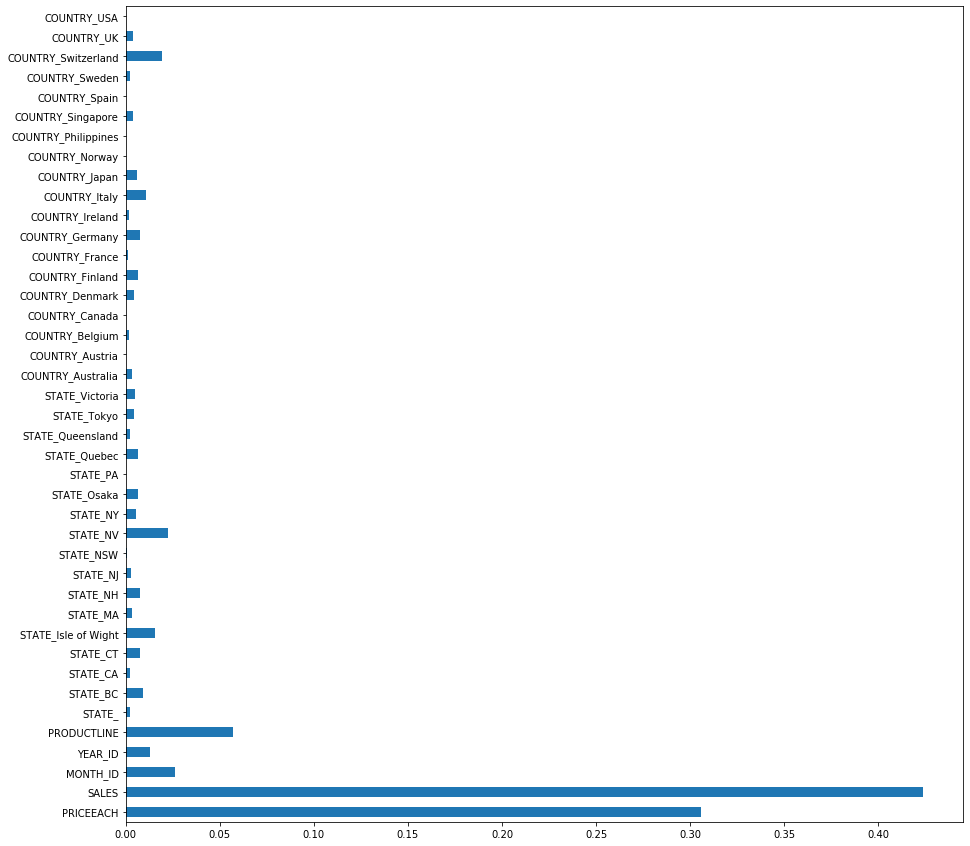

In [9]:
#Random forest example
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2,random_state=202)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
predictions = clf.predict(X_test)
df_p = pd.DataFrame()
df_p['Actual'] = y_test
df_p['Predicted'] = predictions
df_p.head()
import matplotlib.pyplot as plt
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
fig, ax = plt.subplots(1,1, figsize=(15, 15))
feat_importances.plot(kind='barh', ax=ax)
plt.show()